In [1]:
import pandas as pd
import time

def to_epoch(date_time,pattern):
    int(time.mktime(time.strptime(date_time, pattern)))

data = pd.read_csv("~/Downloads/perft_solr_write_time05032019_6-7PM.csv") 
data.count()

id                     246350
DB2_WRITE_TIME_ET      246350
KAFKA_WRITE_TIME_ET    246350
SOLR_UPDATE_TIME_ET    246350
SOLR_WRITE_TIME_GMT    246350
dtype: int64

In [2]:
data['SOLR_UPDATE_TIME_ET']= pd.to_datetime(data['SOLR_UPDATE_TIME_ET']).dt.tz_localize('US/Eastern')
data['KAFKA_WRITE_TIME_ET']= pd.to_datetime(data['KAFKA_WRITE_TIME_ET']).dt.tz_localize('US/Eastern')
data['SOLR_WRITE_TIME_GMT']= pd.to_datetime(data['SOLR_WRITE_TIME_GMT'])
data['SOLR_WRITE_TIME_GMT'] = data['SOLR_WRITE_TIME_GMT'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')

In [3]:
data["time_to_spark"]= (data['SOLR_UPDATE_TIME_ET']-data['KAFKA_WRITE_TIME_ET'])
data["time_from_kafka_to_solr"]= (data['SOLR_WRITE_TIME_GMT']-data['KAFKA_WRITE_TIME_ET'])
data["time_from_kafka_to_spark"]= (data['SOLR_UPDATE_TIME_ET']-data['KAFKA_WRITE_TIME_ET'])
data["time_from_spark_to_solr"]= (data['SOLR_WRITE_TIME_GMT']-data['SOLR_UPDATE_TIME_ET'])

In [4]:
def hr_func(ts):
    return ts.total_seconds()
data["time_to_spark"]=data["time_to_spark"].apply(hr_func)
data["time_from_spark_to_solr"]=data["time_from_spark_to_solr"].apply(hr_func)
data["time_from_kafka_to_solr"]=data["time_from_kafka_to_solr"].apply(hr_func)
#data.head(300)


In [5]:
data["time_from_kafka_to_spark"]=data["time_from_kafka_to_spark"].apply(hr_func)
data[data['time_from_spark_to_solr'] >= 0]['time_from_spark_to_solr'].count()

246142

In [7]:
data = data[data['time_from_spark_to_solr'] >= 0]
data.count()

id                          246142
DB2_WRITE_TIME_ET           246142
KAFKA_WRITE_TIME_ET         246142
SOLR_UPDATE_TIME_ET         246142
SOLR_WRITE_TIME_GMT         246142
time_to_spark               246142
time_from_kafka_to_solr     246142
time_from_kafka_to_spark    246142
time_from_spark_to_solr     246142
dtype: int64

In [8]:
data[data['time_from_kafka_to_solr'] < 0].count()

id                          0
DB2_WRITE_TIME_ET           0
KAFKA_WRITE_TIME_ET         0
SOLR_UPDATE_TIME_ET         0
SOLR_WRITE_TIME_GMT         0
time_to_spark               0
time_from_kafka_to_solr     0
time_from_kafka_to_spark    0
time_from_spark_to_solr     0
dtype: int64

In [9]:
data[data['time_to_spark'] > 15]['time_to_spark'].count()

114865

In [10]:
data['time_from_spark_to_solr'].describe()

count    246142.000000
mean          0.633589
std           2.055218
min           0.058000
25%           0.380000
50%           0.489000
75%           0.659000
max         140.531000
Name: time_from_spark_to_solr, dtype: float64

In [23]:
data['time_from_spark_to_solr'].describe(percentiles=
                               [0,0.10,0.20,0.30,0.40,0.60,0.70,0.80,0.90,0.95,0.99,0.995,.999,1.0])

count    246142.000000
mean          0.633589
std           2.055218
min           0.058000
0%            0.058000
10%           0.332000
20%           0.361000
30%           0.402000
40%           0.445000
50%           0.489000
60%           0.539000
70%           0.612000
80%           0.710000
90%           0.822000
95%           0.914000
99%           2.990000
99.5%         4.717295
99.9%        13.634000
100%        140.531000
max         140.531000
Name: time_from_spark_to_solr, dtype: float64

In [22]:
data["time_from_kafka_to_solr"].describe(percentiles=
                                         [0,0.10,0.20,0.30,0.40,0.60,0.70,0.80,0.90,0.95,0.99,0.995,.999,1.0])

count    246142.000000
mean        108.319633
std         138.770484
min           0.399000
0%            0.399000
10%           1.300000
20%           1.940000
30%           2.584000
40%           3.216000
50%           7.305000
60%          77.427600
70%         175.085500
80%         257.587200
90%         343.364600
95%         380.063000
99%         435.780950
99.5%       457.400885
99.9%       480.643321
100%        486.791000
max         486.791000
Name: time_from_kafka_to_solr, dtype: float64

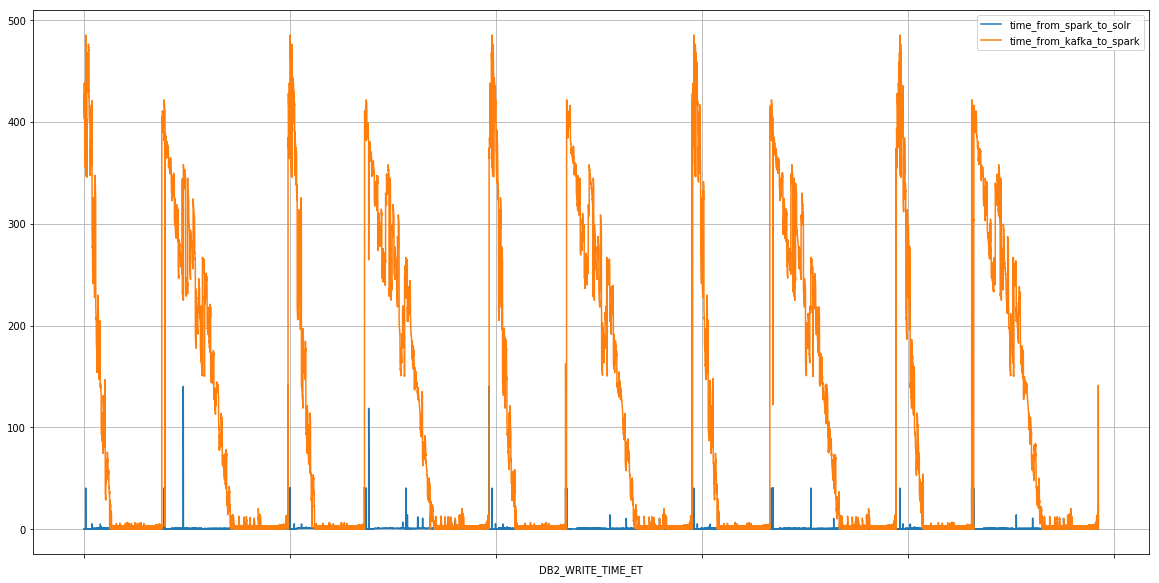

In [19]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
data.plot(y=['time_from_spark_to_solr','time_from_kafka_to_spark'],
          x='DB2_WRITE_TIME_ET', kind='line',grid=True,figsize=(20,10))